<a href="https://colab.research.google.com/github/gunavc/Customer-Churn-Prediction/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data File = https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
display(df)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


Prediction using "ed", "employ", "callcard", "equip", "wireless" columns



Predicting probablities of y are : [[0.56628588 0.43371412]
 [0.56512867 0.43487133]
 [0.5692309  0.4307691 ]
 [0.66540031 0.33459969]
 [0.53373132 0.46626868]
 [0.64105839 0.35894161]
 [0.5218807  0.4781193 ]
 [0.58920219 0.41079781]
 [0.45274683 0.54725317]
 [0.56448138 0.43551862]
 [0.48367103 0.51632897]
 [0.5377661  0.4622339 ]
 [0.61409713 0.38590287]
 [0.45624138 0.54375862]
 [0.70304928 0.29695072]
 [0.53491585 0.46508415]
 [0.45624138 0.54375862]
 [0.44860984 0.55139016]
 [0.44229245 0.55770755]
 [0.60276889 0.39723111]
 [0.49305494 0.50694506]
 [0.46039879 0.53960121]
 [0.64369144 0.35630856]
 [0.48080925 0.51919075]
 [0.50260065 0.49739935]
 [0.67474799 0.32525201]
 [0.48015564 0.51984436]
 [0.4885077  0.5114923 ]
 [0.54358463 0.45641537]
 [0.66853111 0.33146889]
 [0.65532641 0.34467359]
 [0.53906692 0.46093308]
 [0.45909063 0.54090937]
 [0.65651507 0.34348493]
 [0.61618713 0.38381287]
 [0.55883343 0.44116657]
 [0.53490773 0.46509227]
 [0.63659112 0.36340888]
 [0.61793012 0.

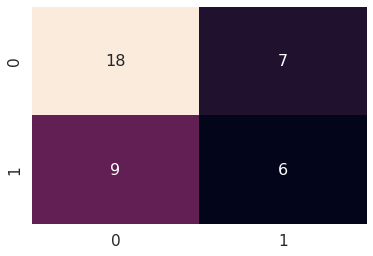

In [46]:
dff = df[["ed","employ","equip","callcard","wireless"]]
x = np.asanyarray(dff)
x = preprocessing.StandardScaler().fit(x).transform(x)

y = np.asanyarray(df["churn"])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_Train, Y_Train)

predict_y = LR.predict(X_Test)
predict_y_prob = LR.predict_proba(X_Test)
print("Predicting probablities of y are :",predict_y_prob)

arr = confusion_matrix(Y_Test, predict_y)
print("Confusion Matrix :")
df_cm = pd.DataFrame(arr, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cbar=False,annot_kws={"size": 16}, color='black')
accuracy = (arr[0,0]+arr[1,1])/(arr[0,0]+arr[0,1]+arr[1,0]+arr[1,1])
print("Accuracy of the model is :",accuracy)

Hence, for the above parameters the accuracy is 60%.

Prediction using "cardmon", "wiremon", "longten" and "tollten"

Predicted probablities of y : [[0.59841699 0.40158301]
 [0.6013541  0.3986459 ]
 [0.55321551 0.44678449]
 [0.58528299 0.41471701]
 [0.54961889 0.45038111]
 [0.54837013 0.45162987]
 [0.54901596 0.45098404]
 [0.55710507 0.44289493]
 [0.53780014 0.46219986]
 [0.57906566 0.42093434]
 [0.51977905 0.48022095]
 [0.54381521 0.45618479]
 [0.56145254 0.43854746]
 [0.53887551 0.46112449]
 [0.56568544 0.43431456]
 [0.55534037 0.44465963]
 [0.55707613 0.44292387]
 [0.58860481 0.41139519]
 [0.5507968  0.4492032 ]
 [0.59802204 0.40197796]
 [0.51470439 0.48529561]
 [0.53323693 0.46676307]
 [0.70553403 0.29446597]
 [0.44945585 0.55054415]
 [0.51225448 0.48774552]
 [0.58092432 0.41907568]
 [0.50201768 0.49798232]
 [0.53725209 0.46274791]
 [0.54031549 0.45968451]
 [0.65643361 0.34356639]
 [0.60389114 0.39610886]
 [0.63425804 0.36574196]
 [0.51738804 0.48261196]
 [0.57089354 0.42910646]
 [0.64115811 0.35884189]
 [0.54855036 0.45144964]
 [0.5408687  0.4591313 ]
 [0.57860775 0.42139225]
 [0.78859959 0.21140

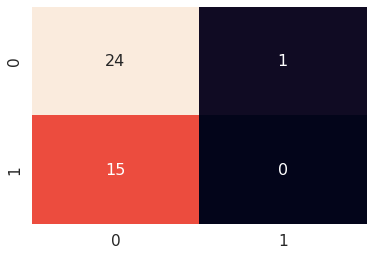

In [47]:
dff = df[["cardmon", "wiremon", "longten", "tollten"]]
x = np.asanyarray(dff)
x = preprocessing.StandardScaler().fit(x).transform(x)
y = np.asanyarray(df["churn"])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_Train, Y_Train)

predict_y = LR.predict(X_Test)
predict_y_prob = LR.predict_proba(X_Test)
print("Predicted probablities of y :",predict_y_prob)

arr = confusion_matrix(Y_Test, predict_y)
print("The confusion matrix :")
df_cm = pd.DataFrame(arr, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cbar=False,annot_kws={"size": 16}, color='black')
accuracy = (arr[0,0]+arr[1,1])/(arr[0,0]+arr[0,1]+arr[1,0]+arr[1,1])
print("Accuracy of the model is :",accuracy)

Hence, for the above parameters the accuracy is only 60%, which is the same as in the first case.

Predicting using "age", "employ", "ed" and "longmon"

Predicted probablities of y : [[0.57632438 0.42367562]
 [0.58148505 0.41851495]
 [0.56288815 0.43711185]
 [0.58123471 0.41876529]
 [0.52217182 0.47782818]
 [0.56405735 0.43594265]
 [0.47497048 0.52502952]
 [0.60945283 0.39054717]
 [0.48116528 0.51883472]
 [0.57526824 0.42473176]
 [0.56067953 0.43932047]
 [0.64649475 0.35350525]
 [0.47408932 0.52591068]
 [0.4840902  0.5159098 ]
 [0.64611106 0.35388894]
 [0.61164437 0.38835563]
 [0.53998632 0.46001368]
 [0.49172759 0.50827241]
 [0.48523635 0.51476365]
 [0.482986   0.517014  ]
 [0.55693056 0.44306944]
 [0.59376516 0.40623484]
 [0.65493617 0.34506383]
 [0.59278792 0.40721208]
 [0.58232795 0.41767205]
 [0.61597163 0.38402837]
 [0.63116273 0.36883727]
 [0.55844203 0.44155797]
 [0.50173199 0.49826801]
 [0.65915564 0.34084436]
 [0.61462298 0.38537702]
 [0.5428129  0.4571871 ]
 [0.49805471 0.50194529]
 [0.62156028 0.37843972]
 [0.56671807 0.43328193]
 [0.59545925 0.40454075]
 [0.47092399 0.52907601]
 [0.52996851 0.47003149]
 [0.76434475 0.23565

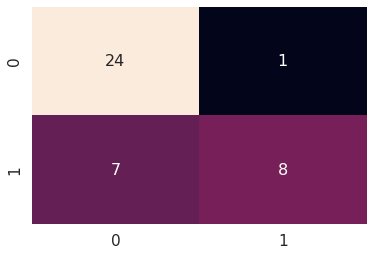

In [48]:
dff = df[["age", "employ", "ed", "longmon"]]
x = np.asanyarray(dff)
x = preprocessing.StandardScaler().fit(x).transform(x)
y = np.asanyarray(df["churn"])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_Train, Y_Train)

predict_y = LR.predict(X_Test)
predict_y_prob = LR.predict_proba(X_Test)
print("Predicted probablities of y :", predict_y_prob)

arr = confusion_matrix(Y_Test, predict_y)
print("The confusion matrix :")
df_cm = pd.DataFrame(arr, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cbar=False,annot_kws={"size": 16}, color='blue')

accuracy = (arr[0,0]+arr[1,1])/(arr[0,0]+arr[0,1]+arr[1,0]+arr[1,1])
print("Accuracy :",accuracy)


Hence, the accuracy using the above parameters is 80%. It can be inferred that it more accurate than the other two cases.

Predicting using "income", "internet", "age", "employ", "longten"

Predicted probablities of y : [[0.55242143 0.44757857]
 [0.5775137  0.4224863 ]
 [0.54992212 0.45007788]
 [0.61261344 0.38738656]
 [0.53152556 0.46847444]
 [0.5663686  0.4336314 ]
 [0.52272393 0.47727607]
 [0.59401341 0.40598659]
 [0.46946894 0.53053106]
 [0.52905045 0.47094955]
 [0.55200263 0.44799737]
 [0.61028332 0.38971668]
 [0.49616692 0.50383308]
 [0.47097374 0.52902626]
 [0.64468895 0.35531105]
 [0.6008131  0.3991869 ]
 [0.52290458 0.47709542]
 [0.48321667 0.51678333]
 [0.47572542 0.52427458]
 [0.52372534 0.47627466]
 [0.5733014  0.4266986 ]
 [0.5346135  0.4653865 ]
 [0.66706889 0.33293111]
 [0.55910474 0.44089526]
 [0.52782242 0.47217758]
 [0.64351912 0.35648088]
 [0.65230691 0.34769309]
 [0.51526927 0.48473073]
 [0.52807225 0.47192775]
 [0.69428692 0.30571308]
 [0.6515078  0.3484922 ]
 [0.57401649 0.42598351]
 [0.48571789 0.51428211]
 [0.58182788 0.41817212]
 [0.60304486 0.39695514]
 [0.58834003 0.41165997]
 [0.4698006  0.5301994 ]
 [0.49328149 0.50671851]
 [0.77882952 0.22117

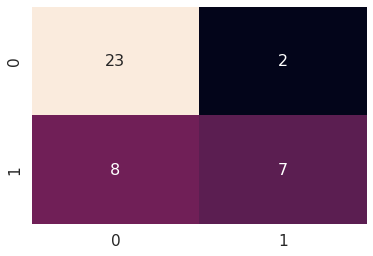

In [49]:
dff = df[["income", "internet", "age", "employ", "longten"]]
x = np.asanyarray(dff)
x = preprocessing.StandardScaler().fit(x).transform(x)
y = np.asanyarray(df["churn"])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_Train, Y_Train)

predict_y = LR.predict(X_Test)
predict_y_prob = LR.predict_proba(X_Test)
print("Predicted probablities of y :", predict_y_prob)

arr = confusion_matrix(Y_Test, predict_y)
print("The confusion matrix :")
df_cm = pd.DataFrame(arr, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cbar=False,annot_kws={"size": 16}, color='blue')

accuracy = (arr[0,0]+arr[1,1])/(arr[0,0]+arr[0,1]+arr[1,0]+arr[1,1])
print("Accuracy :",accuracy)

Hence, the accuracy using the above parameters is 75%. It can be inferred that it less accurate than the previous case.

Prediction using "logtoll", "loglong", "callwait", "pager" and "callcard"

Predicted probablities of y : [[0.64406405 0.35593595]
 [0.58306026 0.41693974]
 [0.54281235 0.45718765]
 [0.55219491 0.44780509]
 [0.52886315 0.47113685]
 [0.55019479 0.44980521]
 [0.49778254 0.50221746]
 [0.64320308 0.35679692]
 [0.47309039 0.52690961]
 [0.5867249  0.4132751 ]
 [0.5648081  0.4351919 ]
 [0.63660817 0.36339183]
 [0.52358444 0.47641556]
 [0.48054924 0.51945076]
 [0.57319245 0.42680755]
 [0.61400228 0.38599772]
 [0.52259652 0.47740348]
 [0.62285807 0.37714193]
 [0.50997434 0.49002566]
 [0.53503339 0.46496661]
 [0.45293136 0.54706864]
 [0.56281805 0.43718195]
 [0.68065353 0.31934647]
 [0.52990223 0.47009777]
 [0.57627384 0.42372616]
 [0.605957   0.394043  ]
 [0.47204865 0.52795135]
 [0.60106957 0.39893043]
 [0.50549041 0.49450959]
 [0.66504113 0.33495887]
 [0.61765068 0.38234932]
 [0.65341465 0.34658535]
 [0.49520582 0.50479418]
 [0.59884502 0.40115498]
 [0.65957087 0.34042913]
 [0.505964   0.494036  ]
 [0.46107799 0.53892201]
 [0.58989036 0.41010964]
 [0.69750522 0.30249

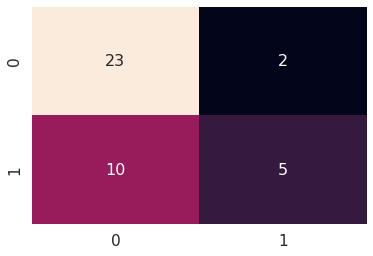

In [50]:
dff = df[["logtoll", "loglong", "callwait", "pager", "callcard"]]
x = np.asanyarray(dff)
x = preprocessing.StandardScaler().fit(x).transform(x)
y = np.asanyarray(df["churn"])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_Train, Y_Train)

predict_y = LR.predict(X_Test)
predict_y_prob = LR.predict_proba(X_Test)
print("Predicted probablities of y :", predict_y_prob)

arr = confusion_matrix(Y_Test, predict_y)
print("The confusion matrix :")
df_cm = pd.DataFrame(arr, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cbar=False,annot_kws={"size": 16}, color='blue')

accuracy = (arr[0,0]+arr[1,1])/(arr[0,0]+arr[0,1]+arr[1,0]+arr[1,1])
print("Accuracy :",accuracy)

Hence, the accuracy using the above parameters is 70%. It can be inferred that it is less accurate than the other cases.